# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

648

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# to track
city_tracker = 1
# set_tracker = 1

# lists for results
max_temp = []
humidity_list = []
cloudiness_results = []
wind_speed = []
cities_list = []
country_list =[]
latitude = []
longitude = []
date = []

print(f"Begin")

# for loop for query
for city in cities:
#     if (i % 50 == 0 and i >= 50):
#         city_tracker = 1
#         set_tracker += 1
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #cities_query 
    response = requests.get(url).json()
    #append to list
    try:
        max_temp.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_results.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
         #results
        print(f"Result # {city_tracker} | {city}")
        #next
        city_tracker += 1
    except: 
        print("Unable to locate city, next result")
        pass
print("End")

Begin
Result # 1 | port victoria
Result # 2 | rikitea
Result # 3 | lompoc
Result # 4 | atuona
Result # 5 | mahbubabad
Result # 6 | aykhal
Result # 7 | mataura
Result # 8 | grants pass
Result # 9 | les cayes
Result # 10 | likasi
Result # 11 | luderitz
Result # 12 | kosh-agach
Result # 13 | winslow
Result # 14 | kodiak
Result # 15 | amapa
Result # 16 | aklavik
Result # 17 | butaritari
Result # 18 | oktyabrskiy
Result # 19 | fort nelson
Unable to locate city, next result
Result # 20 | east london
Result # 21 | kavieng
Result # 22 | tuscaloosa
Result # 23 | punta arenas
Unable to locate city, next result
Result # 24 | fort-shevchenko
Result # 25 | jamestown
Result # 26 | narsaq
Result # 27 | vaini
Result # 28 | busselton
Result # 29 | palmares do sul
Result # 30 | banda aceh
Result # 31 | barrow
Result # 32 | ararat
Result # 33 | christchurch
Result # 34 | tuktoyaktuk
Result # 35 | noyabrsk
Result # 36 | saint-philippe
Result # 37 | mae ramat
Result # 38 | fallon
Result # 39 | goundam
Resu

Result # 296 | korla
Result # 297 | ostrovnoy
Result # 298 | robertsport
Result # 299 | tilichiki
Result # 300 | barabinsk
Result # 301 | gamba
Result # 302 | wynyard
Result # 303 | canutama
Result # 304 | margate
Result # 305 | touros
Result # 306 | goderich
Result # 307 | umuarama
Result # 308 | talnakh
Result # 309 | norman wells
Result # 310 | inuvik
Result # 311 | mantua
Result # 312 | oranjemund
Result # 313 | kitimat
Result # 314 | yangjiang
Result # 315 | sainte-rose
Result # 316 | mehamn
Result # 317 | sitka
Result # 318 | portland
Result # 319 | parauna
Result # 320 | nara
Unable to locate city, next result
Result # 321 | zainsk
Result # 322 | grand gaube
Result # 323 | kutum
Result # 324 | clyde river
Result # 325 | lokhvytsya
Result # 326 | mount gambier
Result # 327 | san luis
Result # 328 | san patricio
Result # 329 | zhangye
Result # 330 | hofn
Result # 331 | romny
Result # 332 | cabo san lucas
Result # 333 | pizarro
Result # 334 | hay river
Result # 335 | namibe
Result 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#dictionary
Results = {
    "City": cities_list,
    "Country": country_list,
    "Latitude": latitude,
    "Longitude": longitude,
    "Date": date,
    "Cloudiness": cloudiness_results,
    "Humidity": humidity_list,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_api_df = pd.DataFrame(Results)
weather_api_df.count()

City          596
Country       596
Latitude      596
Longitude     596
Date          596
Cloudiness    596
Humidity      596
Max Temp      596
Wind Speed    596
dtype: int64

In [5]:
weather_api_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Port Victoria,KE,0.09,33.98,1594666349,58,66,71.78,1.10
1,Rikitea,PF,-23.12,-134.97,1594666350,56,84,72.88,15.17
2,Lompoc,US,34.64,-120.46,1594666289,3,72,69.01,8.05
3,Atuona,PF,-9.80,-139.03,1594666350,5,77,79.81,21.39
4,Mahbūbābād,IN,17.62,80.02,1594666350,100,77,81.09,2.30


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_api_df.describe()

,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
count,596.000000,596.000000,5.960000e+02,596.000000,596.000000,596.000000,596.000000
mean,18.558742,14.692651,1.594666e+09,50.837248,67.984899,70.292651,7.820638
std,32.912971,91.569230,1.658805e+02,39.804084,20.904941,14.739262,5.326278
min,-54.800000,-175.200000,1.594666e+09,0.000000,8.000000,26.600000,0.310000
25%,-7.987500,-65.795000,1.594666e+09,5.000000,56.000000,59.000000,3.685000
50%,20.840000,20.235000,1.594666e+09,50.000000,72.000000,72.005000,6.710000
75%,45.400000,97.337500,1.594666e+09,91.250000,83.000000,80.770000,10.660000
max,78.220000,178.420000,1.594666e+09,100.000000,100.000000,106.000000,32.770000


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

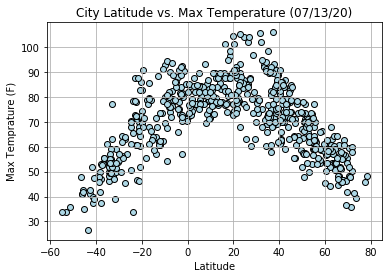

In [9]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Max Temp"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

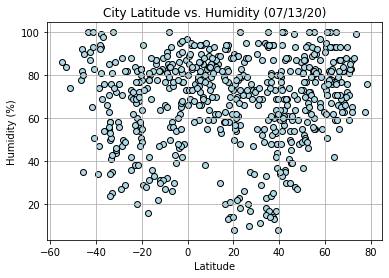

In [10]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Humidity"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

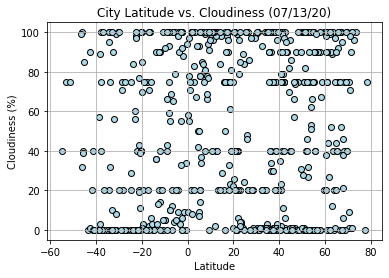

In [11]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Cloudiness"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

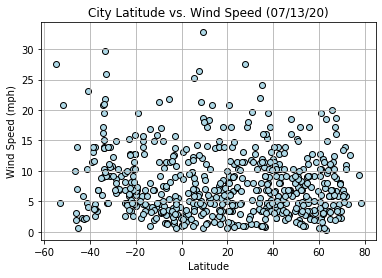

In [12]:
plt.scatter(weather_api_df["Latitude"], weather_api_df["Wind Speed"], marker = "o", facecolor = "lightblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_lat_df = weather_api_df.loc[weather_api_df["Latitude"] >= 0, :]
northern_lat_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,Port Victoria,KE,0.09,33.98,1594666349,58,66,71.78,1.10
2,Lompoc,US,34.64,-120.46,1594666289,3,72,69.01,8.05
4,Mahbūbābād,IN,17.62,80.02,1594666350,100,77,81.09,2.30
5,Aykhal,RU,66.00,111.50,1594666140,75,55,60.80,4.47
7,Grants Pass,US,42.44,-123.33,1594666351,1,36,77.00,12.75


In [15]:
southern_lat_df = weather_api_df.loc[weather_api_df["Latitude"] < 0, :]
southern_lat_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
1,Rikitea,PF,-23.12,-134.97,1594666350,56,84,72.88,15.17
3,Atuona,PF,-9.80,-139.03,1594666350,5,77,79.81,21.39
6,Mataura,NZ,-46.19,168.86,1594666232,100,92,40.87,3.11
9,Likasi,CD,-10.98,26.73,1594666351,0,48,62.17,4.09
10,Lüderitz,NA,-26.65,15.16,1594666351,0,82,57.20,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.72
The r-squared is: 0.5167164230538763


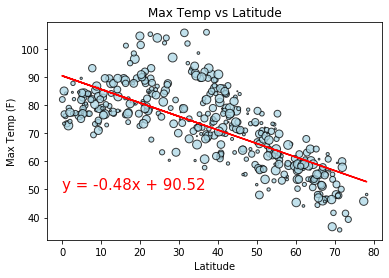

In [16]:
Latitude = northern_lat_df["Latitude"]
Max_Temp = northern_lat_df["Max Temp"]
correlation = st.pearsonr(Latitude, Max_Temp)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temp)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Max_Temp, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.81
The r-squared is: 0.6487669256515772


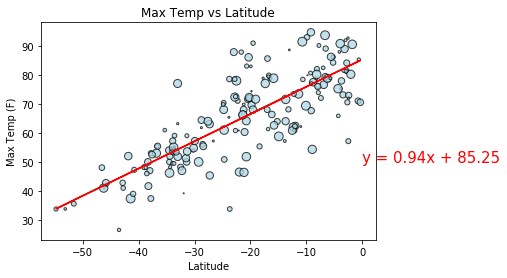

In [17]:
Latitude = southern_lat_df["Latitude"]
Max_Temp = southern_lat_df["Max Temp"]
correlation = st.pearsonr(Latitude, Max_Temp)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temp)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Max_Temp, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.04
The r-squared is: 0.0013027735312828776


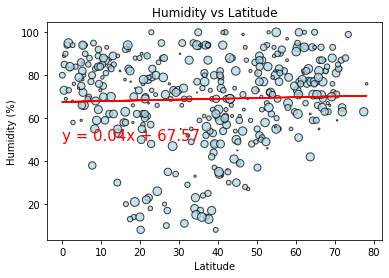

In [18]:
Latitude = northern_lat_df["Latitude"]
Humidity = northern_lat_df["Humidity"]
correlation = st.pearsonr(Latitude, Humidity)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.06
The r-squared is: 0.0031373688132124164


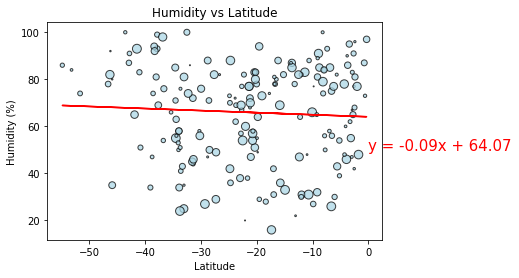

In [19]:
Latitude = southern_lat_df["Latitude"]
Humidity = southern_lat_df["Humidity"]
correlation = st.pearsonr(Latitude, Humidity)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Humidity, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.05
The r-squared is: 0.002067977465322844


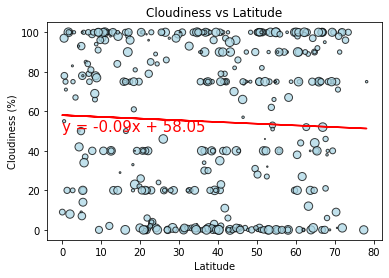

In [20]:
Latitude = northern_lat_df["Latitude"]
Cloudiness = northern_lat_df["Cloudiness"]
correlation = st.pearsonr(Latitude, Cloudiness)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.11
The r-squared is: 0.01317311270856244


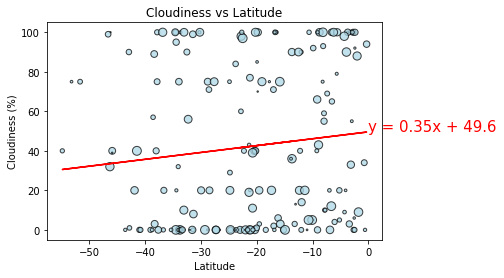

In [21]:
Latitude = southern_lat_df["Latitude"]
Cloudiness = southern_lat_df["Cloudiness"]
correlation = st.pearsonr(Latitude, Cloudiness)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Cloudiness, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.03
The r-squared is: 0.0011536553617639564


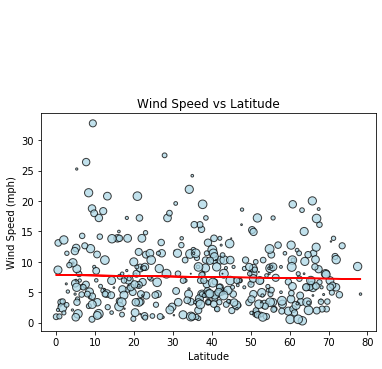

In [22]:
Latitude = northern_lat_df["Latitude"]
Wind_Speed = northern_lat_df["Wind Speed"]
correlation = st.pearsonr(Latitude, Wind_Speed)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.26
The r-squared is: 0.0655641952911156


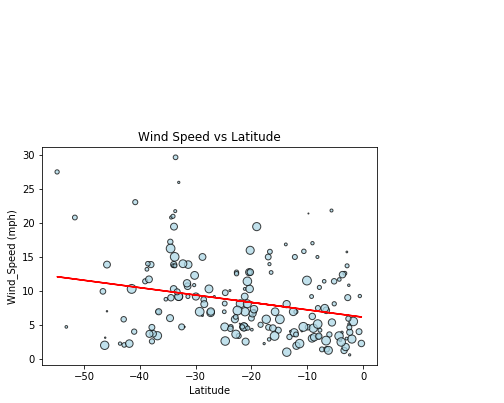

In [23]:
Latitude = southern_lat_df["Latitude"]
Wind_Speed = southern_lat_df["Wind Speed"]
correlation = st.pearsonr(Latitude, Wind_Speed)
x_limit = 80
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
regress_values = Latitude* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Latitude, Wind_Speed, marker="o", facecolors="lightblue", edgecolors="black",
             s=x_axis, alpha=0.75)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(Latitude,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [26]:
weather_api_df.to_csv("Output/weather.csv", index=False, header=True)